# Finding Optimal Learning Rate - Dense Network

* Before running the experiments try to find an optimal LR range for the given data/batchsize and Network

[Source](jeremyjordan.me/nn-learning-rate)

In [7]:
import tensorflow as tf
from tensorflow import keras
import time

from functions_dataCreation import *
from functions_modelArchitectures import *
from class_LRFinder import *

set_x,set_y = readXYfromDisk(noOfFiles=27,folder="../data/Train") #Training data
test_set_x,test_set_y = readXYfromDisk(noOfFiles=1,folder='../data/Test') 

# Change the target from UP,DOWN and NO CHANGE to UP(1) and NOT UP(0)
set_y[set_y == 1] = 0
set_y[set_y == 2] = 1

test_set_y[test_set_y == 1] = 0
test_set_y[test_set_y == 2] = 1

IMG_SIZE = 128


X Shape :  (114364, 128, 128, 3) Memory size is : 5360.8125 Mb Y Shape:  (114364,)
Values, counts, Avg Performance :  [0 1 2] [59258 26852 28254] [0.51815257 0.23479417 0.24705327]
X Shape :  (5027, 128, 128, 3) Memory size is : 235.640625 Mb Y Shape:  (5027,)
Values, counts, Avg Performance :  [0 1 2] [2299 1324 1404] [0.45733042 0.26337776 0.27929182]


## Create model structures

In [3]:
IMG_SIZE = 128
modelBase = {}
modelBase['inputShape'] = (IMG_SIZE,IMG_SIZE,3)
modelBase['units'] = 128
modelBase['activation'] = 'relu'

# Tiny
modelTiny = modelBase.copy()
modelTiny['name'] = 'Tiny'
modelTiny['layers'] = 1

# Small
modelSmall =  modelBase.copy()
modelSmall['name'] = 'Small'
modelSmall['layers'] = 6

# Medium
modelMedium =  modelBase.copy()
modelMedium['name'] = 'Medium'
modelMedium['layers'] = 12

modelMedium_L2 = modelMedium.copy()
modelMedium_L2['name'] = 'Medium_L2'
modelMedium_L2['L2_regRate'] = 0.0001

modelMedium_Dropout = modelMedium.copy()
modelMedium_Dropout['name'] = 'Medium_Dropout'
modelMedium_Dropout['dropout'] = 0.5

# Large
modelLarge =  modelBase.copy()
modelLarge['name'] = 'Large'
modelLarge['layers'] = 24

modelLarge_L2 =  modelLarge.copy()
modelLarge_L2['name'] = 'Large_L2'
modelLarge_L2['L2_regRate'] = 0.0001

modelLarge_Dropout = modelLarge.copy()
modelLarge_Dropout['name'] = 'Large_Dropout'
modelLarge_Dropout['dropout'] = 0.5

# XLarge
modelXLarge =  modelBase.copy()
modelXLarge['name'] = 'XLarge'
modelXLarge['layers'] = 48

modelXLarge_L2 =  modelXLarge.copy()
modelXLarge_L2['name'] = 'XLarge_L2'
modelXLarge_L2['L2_regRate'] = 0.0001

modelXLarge_Dropout =  modelXLarge.copy()
modelXLarge_Dropout['name'] = 'XLarge_Dropout'
modelXLarge_Dropout['Dropout'] = 0.5

# Model names
# models = [x for x in locals() if re.match('^model.*', x)][3:]

## Look at Model and Batch Size combos

### Batch Size 256

Medium


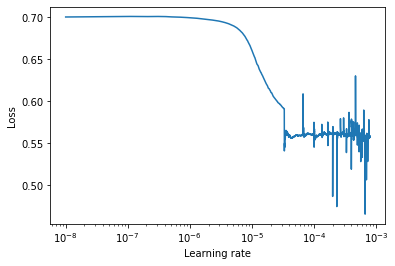

Elapsed time 3.17
Medium_L2


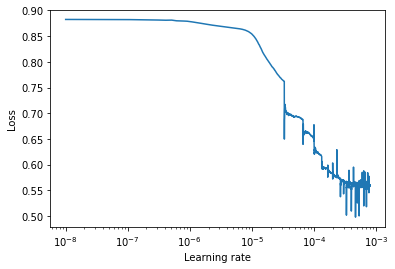

Elapsed time 3.25
Medium_Dropout


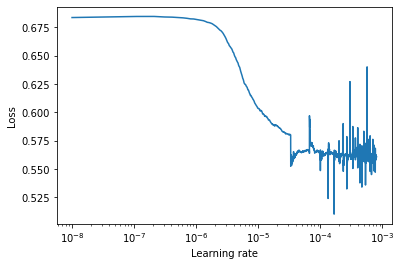

Elapsed time 3.16
Large


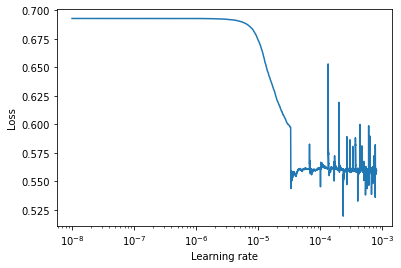

Elapsed time 3.83
Large_L2


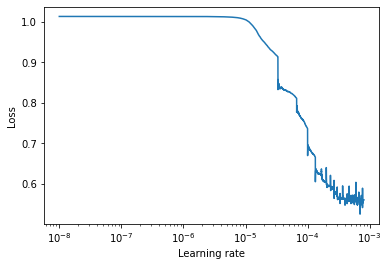

Elapsed time 4.03
Large_Dropout


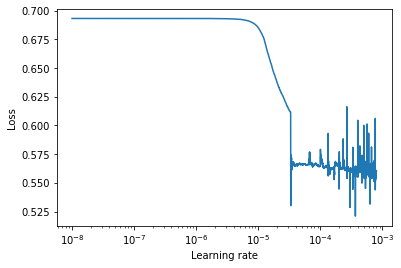

Elapsed time 3.73
XLarge


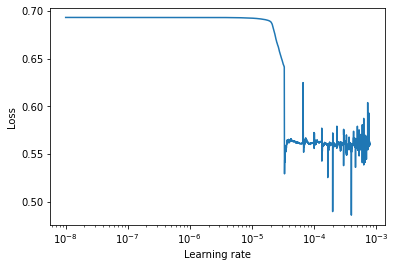

Elapsed time 5.02
XLarge_L2


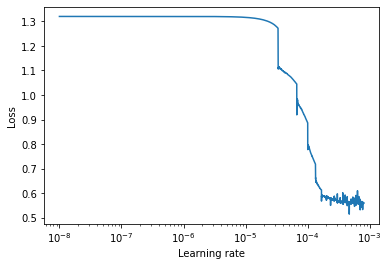

Elapsed time 5.5
XLarge_Dropout


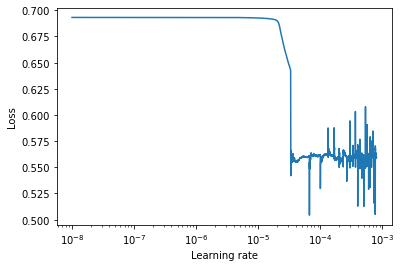

Elapsed time 5.12


In [4]:
# lr_finder = LRFinder(min_lr=1e-8,max_lr=1e-4, steps_per_epoch=np.ceil(set_x.shape[0]/256), epochs=5)

import time

for m in [modelMedium,modelMedium_L2,modelMedium_Dropout,modelLarge,modelLarge_L2,modelLarge_Dropout,modelXLarge,modelXLarge_L2,modelXLarge_Dropout]:
    start_time = time.time()
    print(m['name'])

    model = createFullyConnected(m)
    model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=1e-4)
                ,loss=tf.keras.losses.binary_crossentropy)
    
    lr_finder = LRFinder(min_lr=1e-8,max_lr=1e-4, steps_per_epoch=np.ceil(set_x.shape[0]/256), epochs=3)    
    model.fit(set_x, set_y
            ,batch_size = 256
            ,epochs= 24
            ,verbose=0
            ,callbacks=[lr_finder]
            )
    
    lr_finder.plot_loss()

    print("Elapsed time", round((time.time() - start_time)/60,2))



## Batch Size 128

Medium


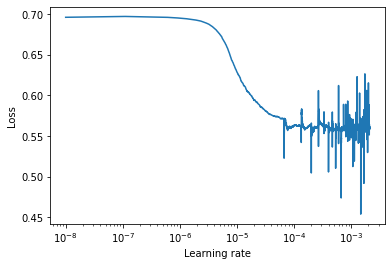

Elapsed time  5.5
Medium_L2


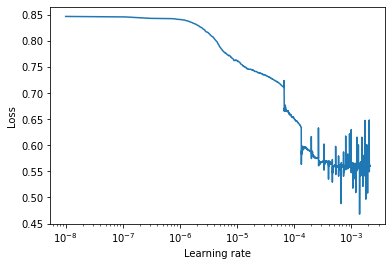

Elapsed time  5.82
Medium_Dropout


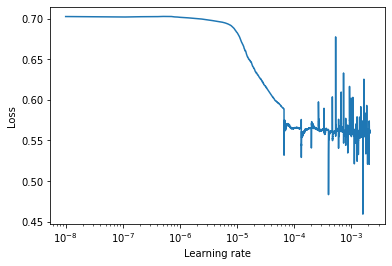

Elapsed time  5.54
Large


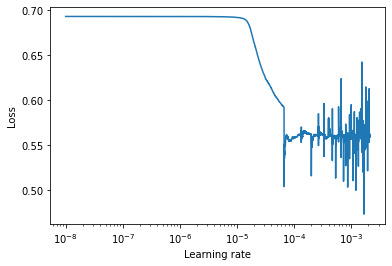

Elapsed time  6.31
Large_L2


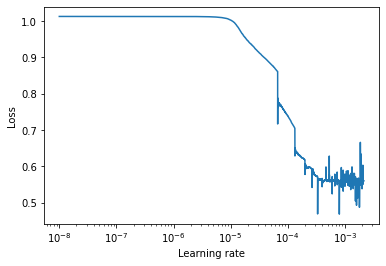

Elapsed time  6.73
Large_Dropout


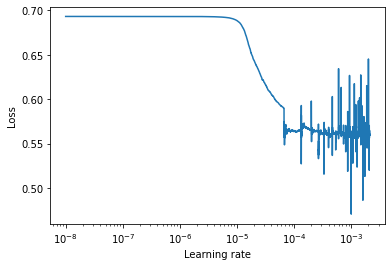

Elapsed time  6.35
XLarge


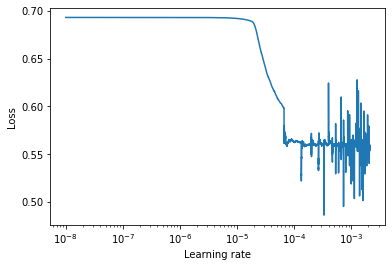

Elapsed time  8.15
XLarge_L2


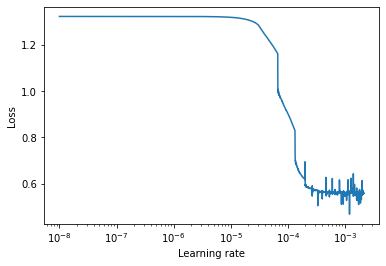

Elapsed time  9.44
XLarge_Dropout


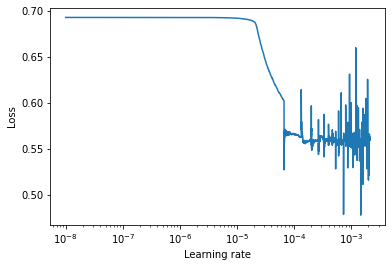

Elapsed time  8.04


In [5]:

import time

for m in [modelMedium,modelMedium_L2,modelMedium_Dropout,modelLarge,modelLarge_L2,modelLarge_Dropout,modelXLarge,modelXLarge_L2,modelXLarge_Dropout]:
    start_time = time.time()
    print(m['name'])

    model = createFullyConnected(m)
    model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=1e-4)
                ,loss=tf.keras.losses.binary_crossentropy)
    
    lr_finder = LRFinder(min_lr=1e-8,max_lr=1e-4, steps_per_epoch=np.ceil(set_x.shape[0]/256), epochs=3)    
    model.fit(set_x, set_y
            ,batch_size = 128
            ,epochs= 32
            ,verbose=0
            ,callbacks=[lr_finder]
            )
    
    lr_finder.plot_loss()

    print("Elapsed time ", round((time.time() - start_time)/60,2))



## Batch size 64

Small


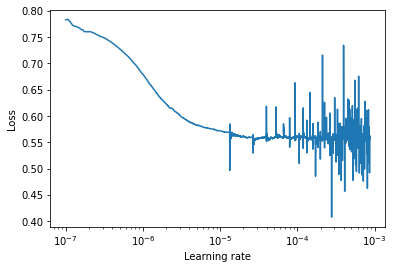

Elapsed time  22.12
Medium_Dropout


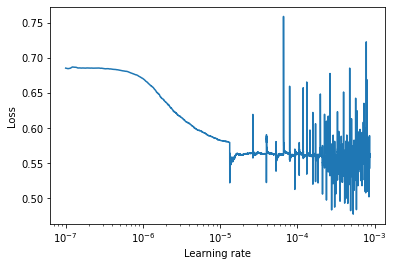

Elapsed time  24.11
Large_Dropout


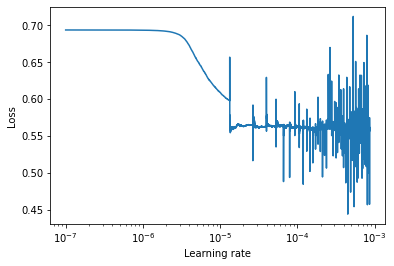

Elapsed time  28.57
XLarge_Dropout


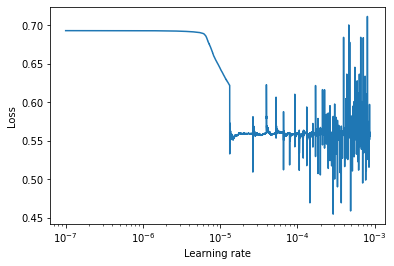

Elapsed time  37.47


In [7]:

for m in [modelSmall,modelMedium_Dropout,modelLarge_Dropout,modelXLarge_Dropout]:
    start_time = time.time()
    print(m['name'])

    model = createFullyConnected(m)
    model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=1e-7)
                ,loss=tf.keras.losses.binary_crossentropy)
    
    lr_finder = LRFinder(min_lr=1e-7,max_lr=1e-5, steps_per_epoch=np.ceil(set_x.shape[0]/256), epochs=3)    
    model.fit(set_x, set_y
            ,batch_size = 64
            ,epochs= 66
            ,verbose=0
            ,callbacks=[lr_finder]
            )
    
    lr_finder.plot_loss()

    print("Elapsed time ", round((time.time() - start_time)/60,2))

